# LTFS Data Science FinHack 3 Approach
By: mdalvi (milind.dalvi14@gmail.com) / https://www.linkedin.com/in/milinddalvi / +91-7738624226

## Problem Statement

LTFS Top-up loan Up-sell prediction (Top-up Month)

A loan is when you receive the money from a financial institution in exchange for future repayment of the principal, plus interest. Financial institutions provide loans to the industries, corporates and individuals. The interest received on these loans is one among the main sources of income for the financial institutions.

A top-up loan, true to its name, is a facility of availing further funds on an existing loan. When you have a loan that has already been disbursed and under repayment and if you need more funds then, you can simply avail additional funding on the same loan thereby minimizing time, effort and cost related to applying again.

LTFS provides it’s loan services to its customers and is interested in selling more of its Top-up loan services to its existing customers so they have decided to identify when to pitch a Top-up during the original loan tenure.  If they correctly identify the most suitable time to offer a top-up, this will ultimately lead to more disbursals and can also help them beat competing offerings from other institutions.

To understand this behaviour, LTFS has provided data for its customers containing the information whether that particular customer took the Top-up service and when he took such Top-up service, represented by the target variable Top-up Month.

--------------------------------------------------------------------------------------

## System Requirements

The solution file is devloped and tested on **Free GPU Notebooks** provided by https://gradient.paperspace.com with following configuration,

* CPU Cores: 8
* RAM: 30GB
* GPU: NVIDIA M4000 GPU

--------------------------------------------------------------------------------------

## Plotting Target Distribution

The provided dataset had seven imbalanced categories (multi-class classification problem) 
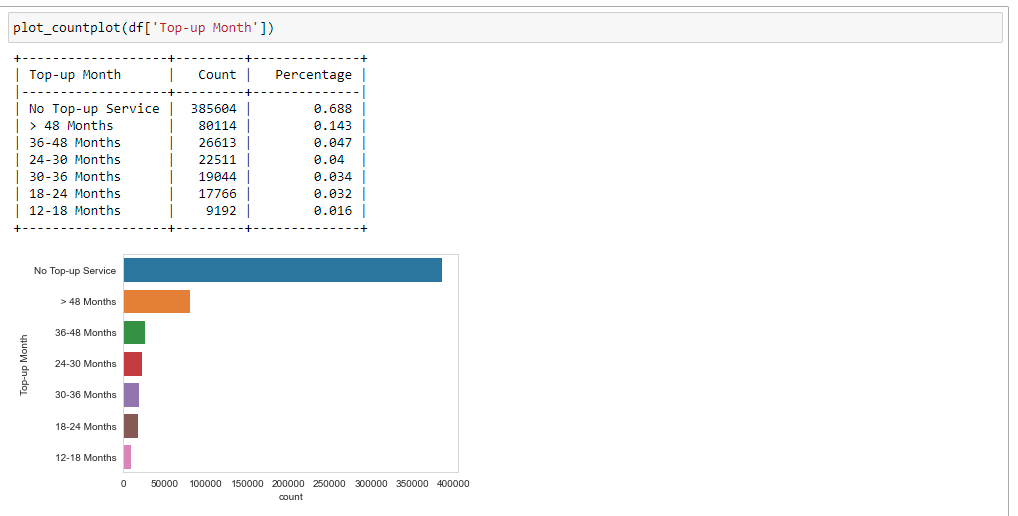

--------------------------------------------------------------------------------------

## Merging Datasets 

Initially the provided datasets were merged with **bureau data** on the left and **ltfs data** on the right with a **"left join"** on **"ID"** column.

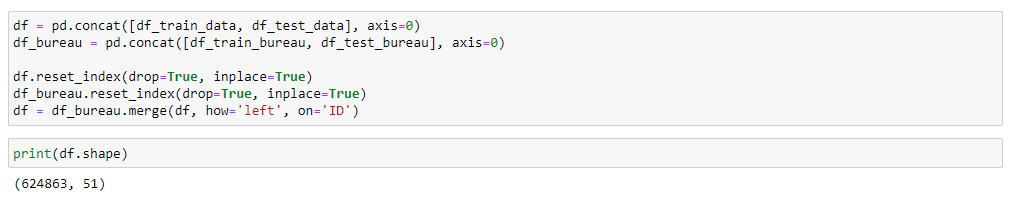

The shape of the final dataset is observed to be (624863, 51)

--------------------------------------------------------------------------------------

## Cleaning Data

1) Some date columns were not appropriately recognized hence the below opertation,

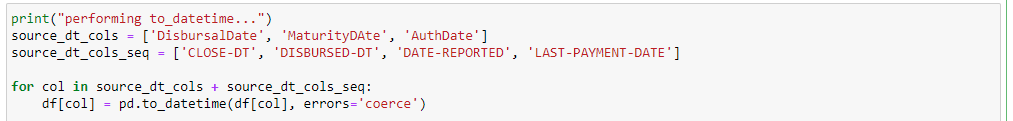

2) **"MaturityDAte"** for certain records were missing, hence a median maturity was added w.r.t. **"DisbursalDate"**

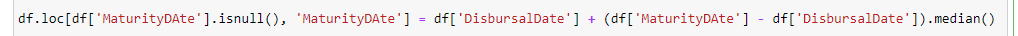

3) **"ASSET_CLASS"** column had some values like "01", "1" and "2". Assumed them to coincide with exising majority classes, **"Standard"** and **"SubStandard"**

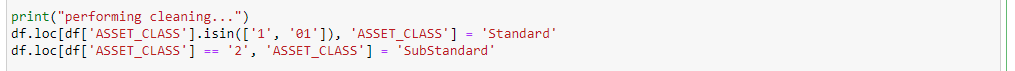

4) Various amount related columns in bureau data had to be converted to **"float"** dtype.

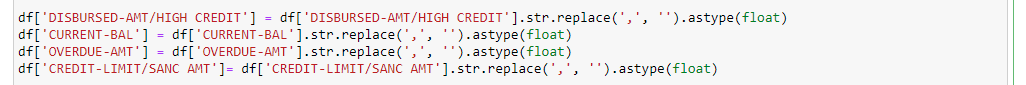

5) **City** names were spotted to be duplicates across multiple states hence a unique identification had to be created by merging with state names.

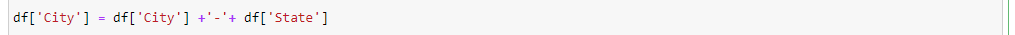

6) Missing categorical features were filled with default value **"NOT_AVAILABLE"**

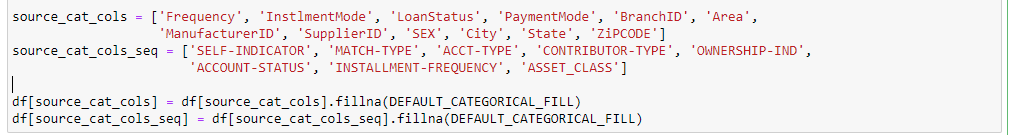

7) **"INSTALLMENT-AMT"** column had to be treated with regular expression to actully segregate installment and frequency.

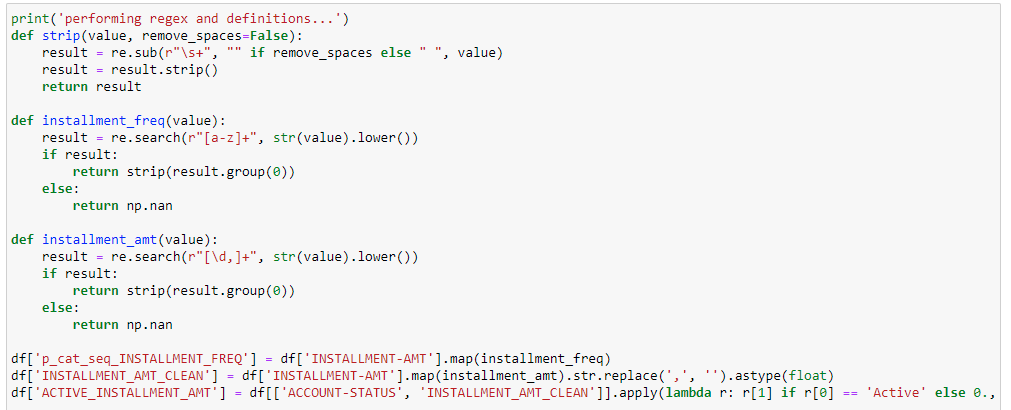

8) Monthly installment and Monthly installement of only **"Active"** accounts were then created based on interpreting the **"INSTALLMENT-AMT"** by frequency.

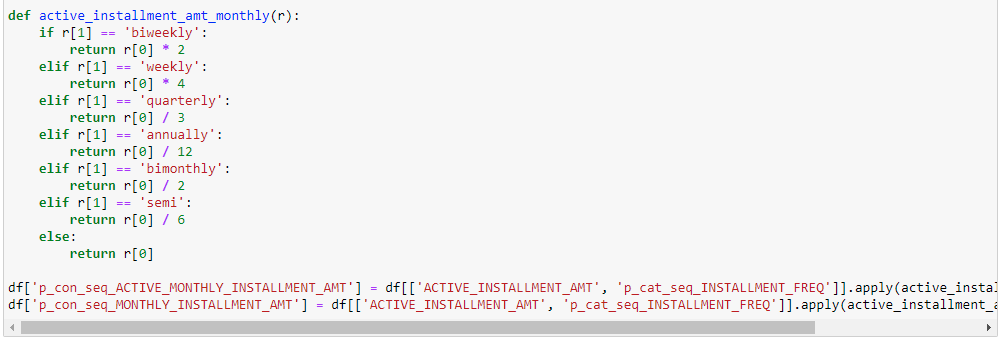

9) In ltfs dataset some "EMI" values were found to be misleading, such that even after multiplying with "Tenure (in months)" the amount won't add-up to **"DisbursalAmount"** hence assumed corrections by multiplying with 10.

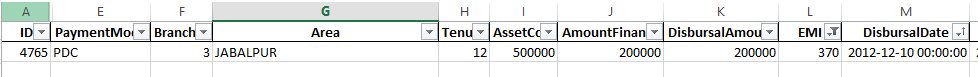
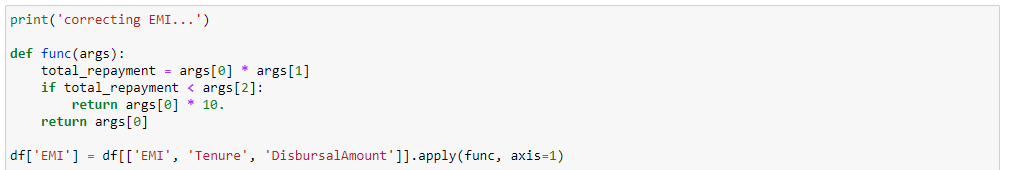

10) Took the highest credit or the DISBURSED-AMT as name implies,

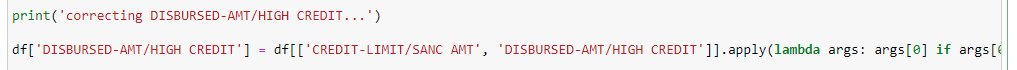

--------------------------------------------------------------------------------------

## Engineering basic features

1) Early features engineering include finding certain **"ratios", "differences" and "multiplicative"** features

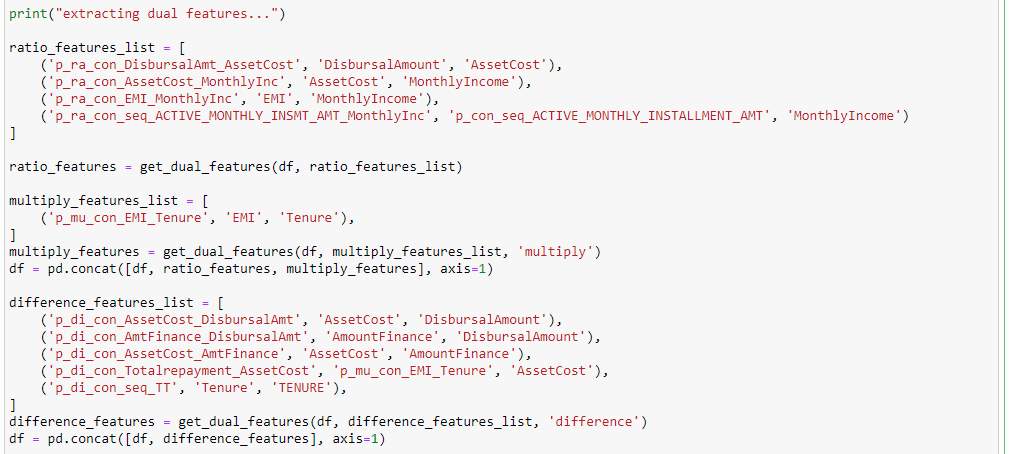

2) Then some additonal features based on dates from bureau and ltfs loan tenure were re-calculated.

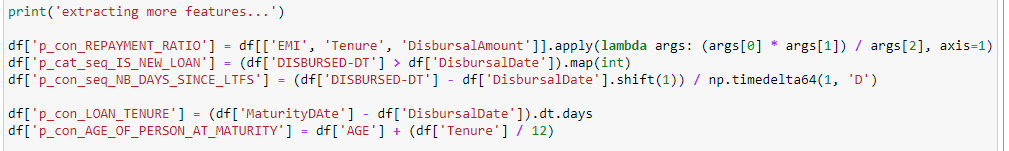

3) Binning continuous values like **"LTV"** and **"AGE"** features,

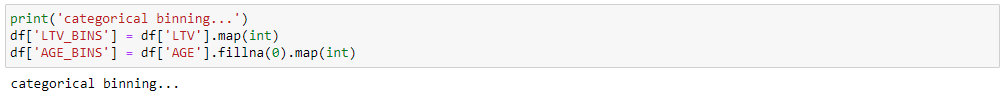

4) Preparing composite categorical features like combination of "ACC-TYPE" AND "CONTRIBUTER-TYPE". These features shall be later used for finding new insights into continouous features by grouping on them.

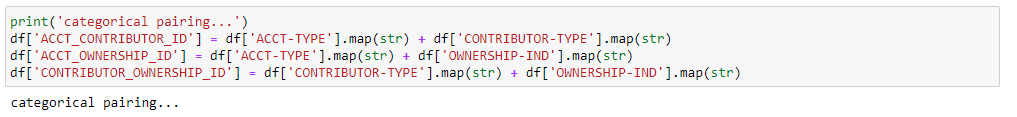

5) Binary bins from target were created, these will be used later in **FeatureTools"** to create **percent_true** primitive features

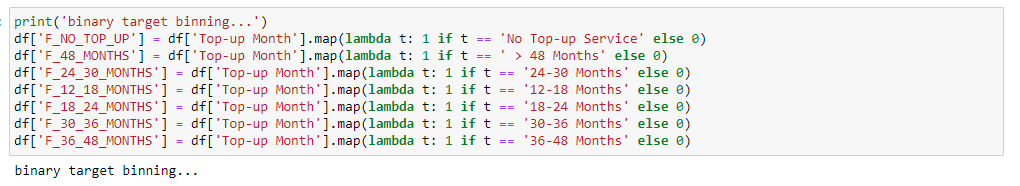

## Engineering normalized continuous values using DataFrame.groupby

1) A groupby over **"ACCT-TYPE"** to determine normalized disbursal rates, normalized overdue amounts over account types and so on...

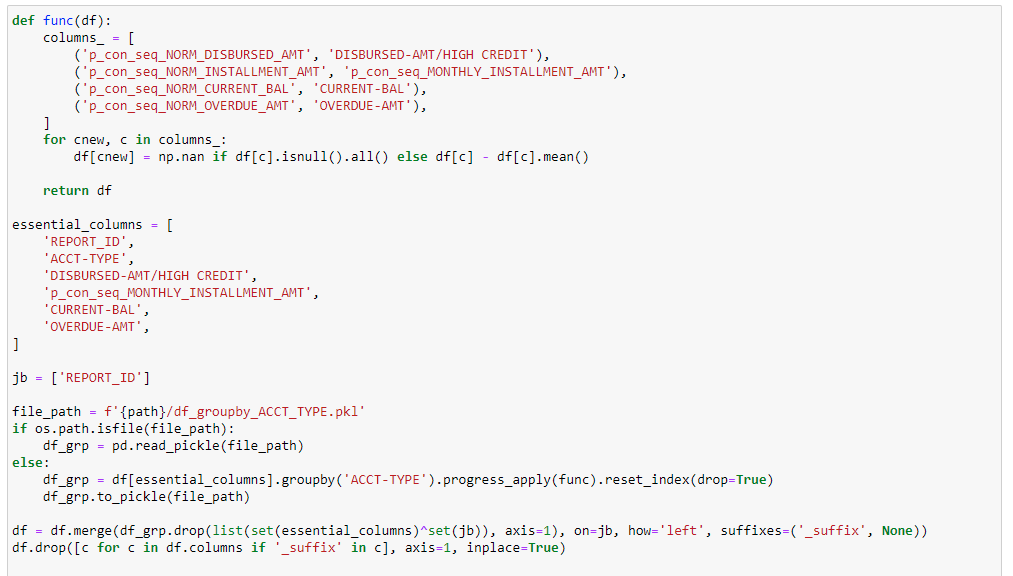

2) Similarly over **"AGE_BINS"** to determine the monthly income worth normalized across age of other loan owners.

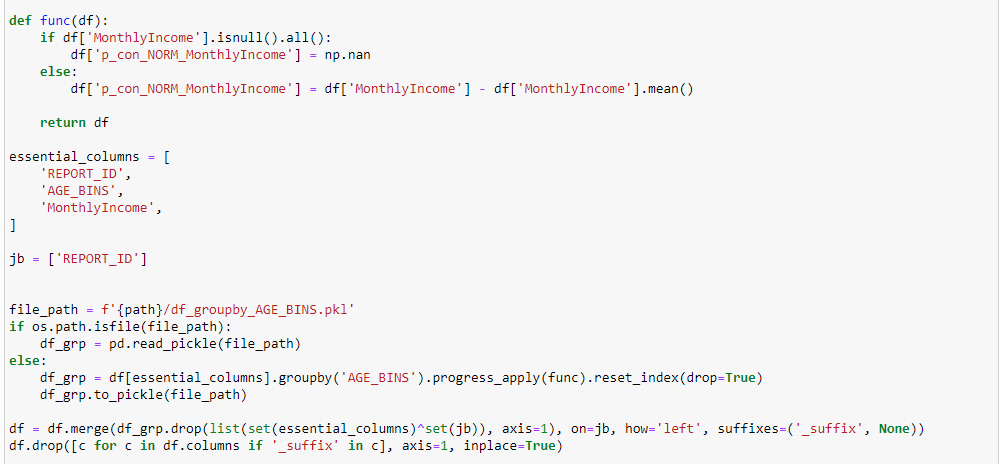

3) Similarly over **"BranchID"** to determine the disbural amount normalized across all branches.

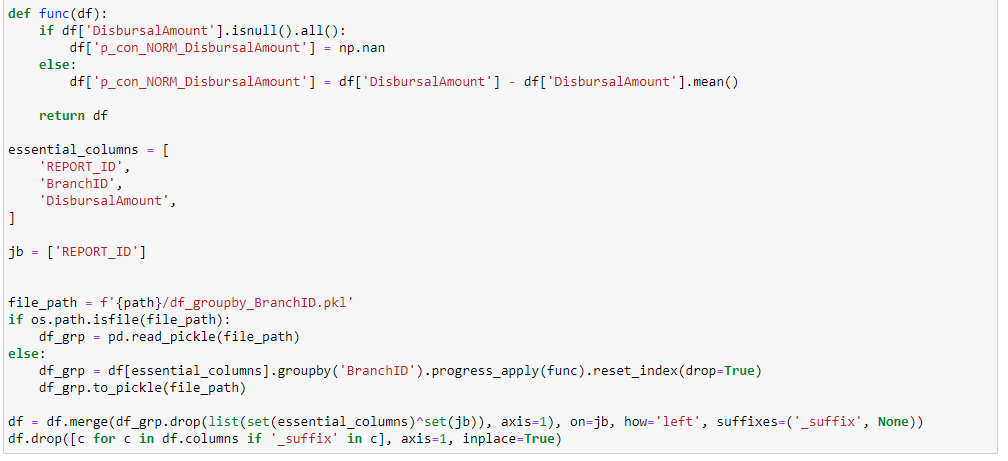

## Enter FeatureTools
- https://www.featuretools.com

1) FeatureTools requires you to have a identifier for every record, thus creating **"REPORT_ID"**

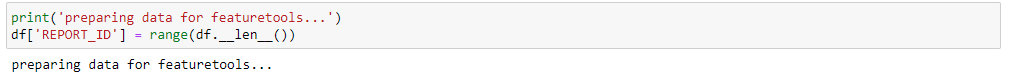

2) Converting date into ordinals, these will be used for **"min", "max", "mean" and "std"** aggregation primitives

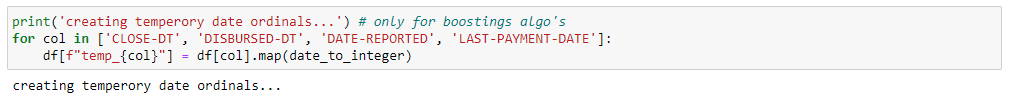

3) In featuretools the dataset can be divide into entities. These entities are then related and features can be extracted by targeting them. Using a custom mapping dictionary we then create an entitiy set for our data which looks like below,

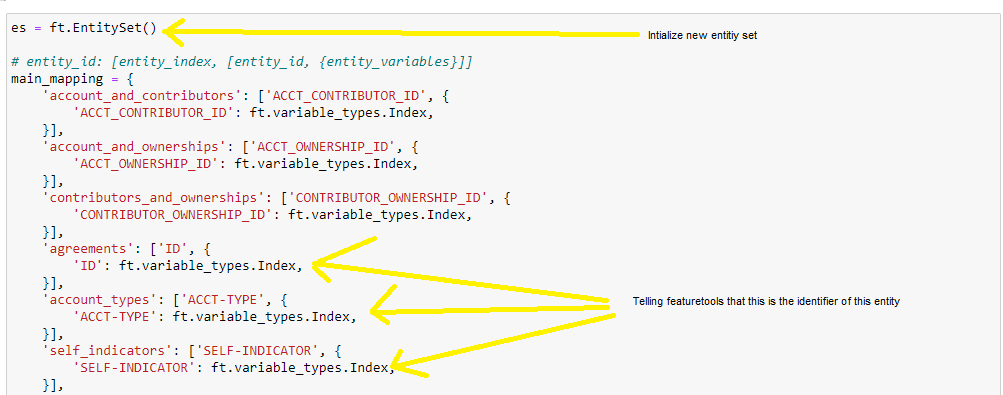
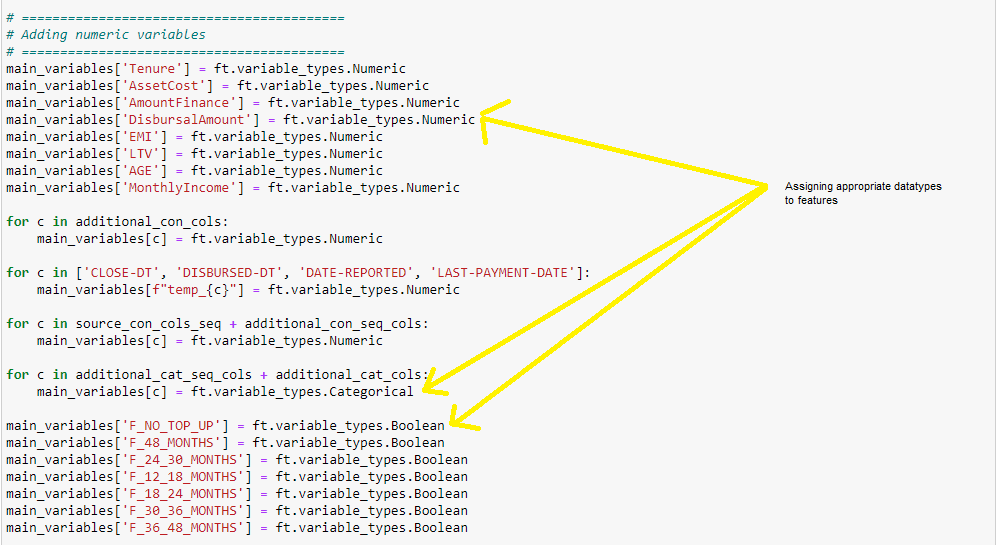
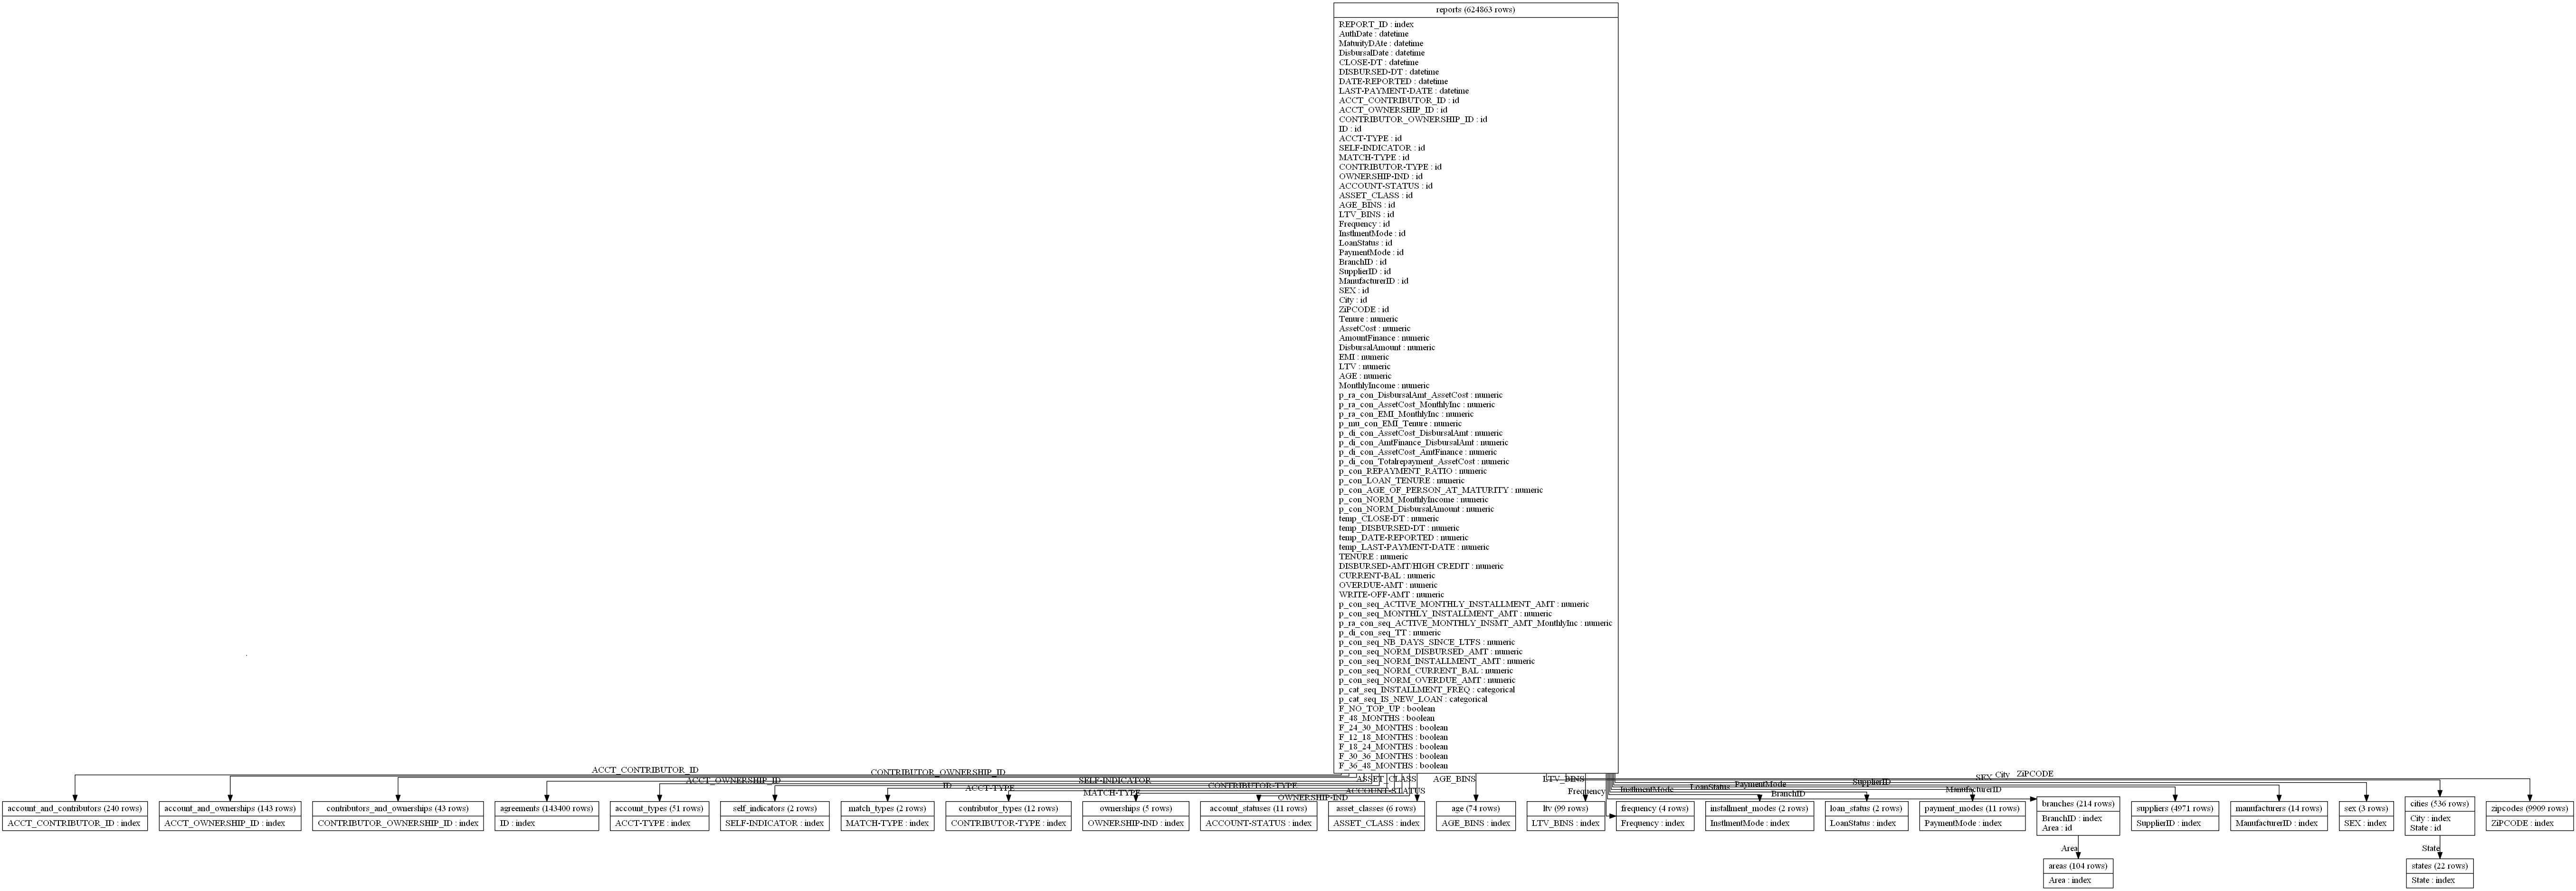

4) Then we configure our target entitites like below,

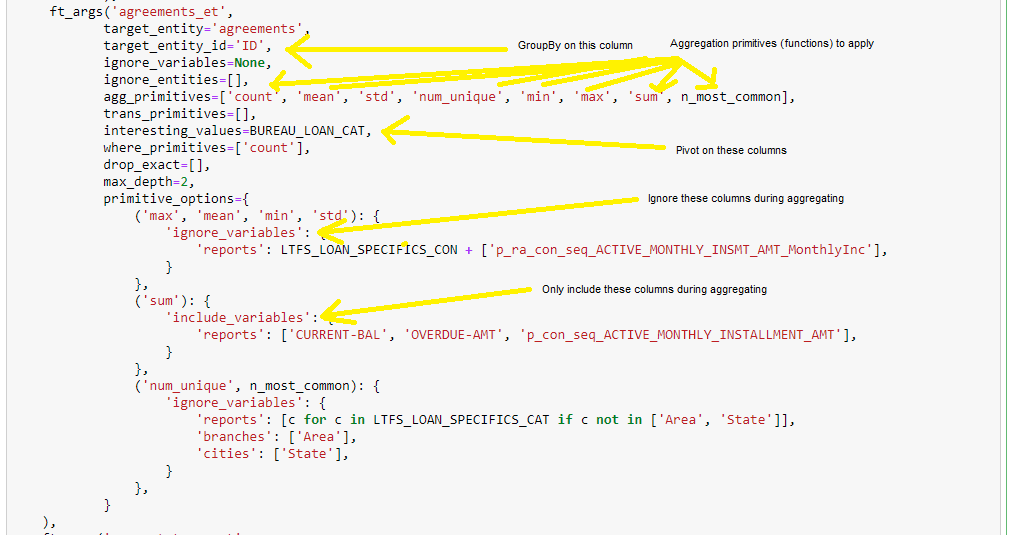

5) Then we create the features using featuretools.dfs method
 - https://featuretools.alteryx.com/en/stable/generated/featuretools.dfs.html

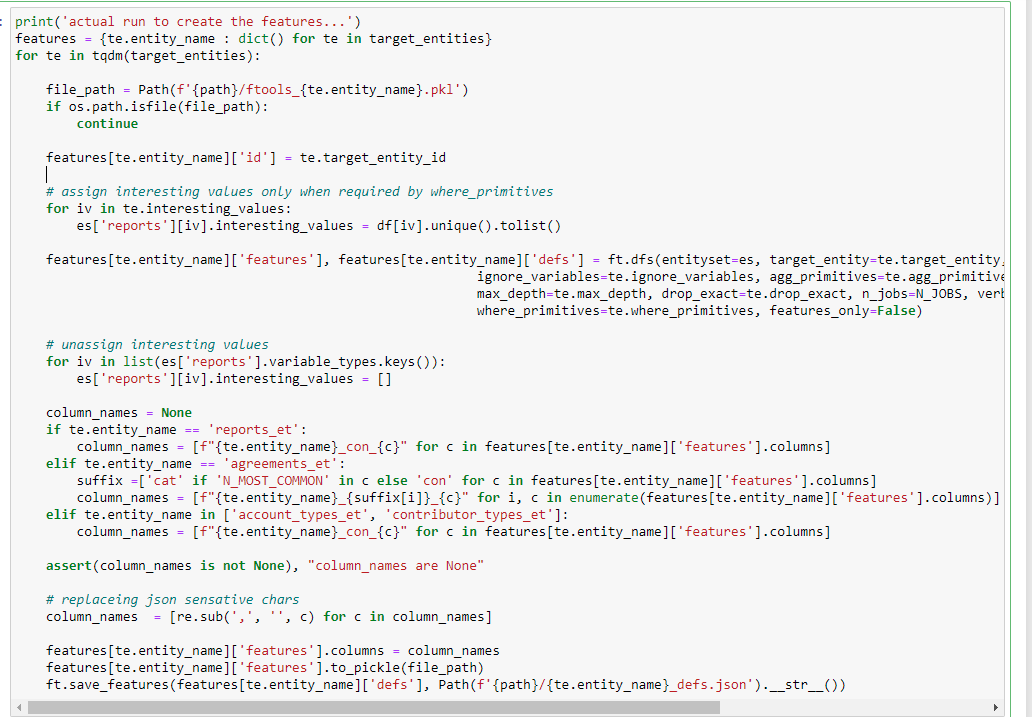

6) Then we merge these features with original dataframe, (in product scenario these can be UPDATE operation on existing datatables)

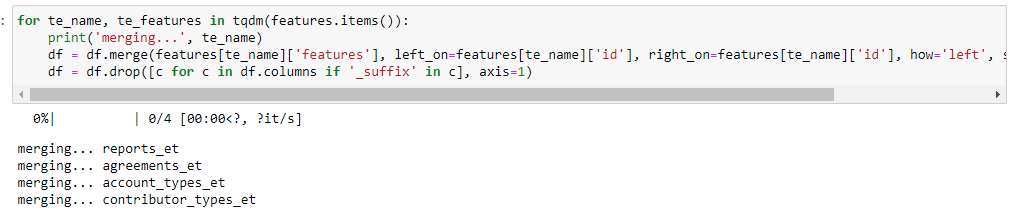

## Encoding Features

1) We now encode our categorical features using **category_encoders.OridnalEncoder"**, also encode the target usign **sklearn.preprocessing.LabelEncoder"** and also make sure not to leave an np.inf or -np.inf behind in continouous data,

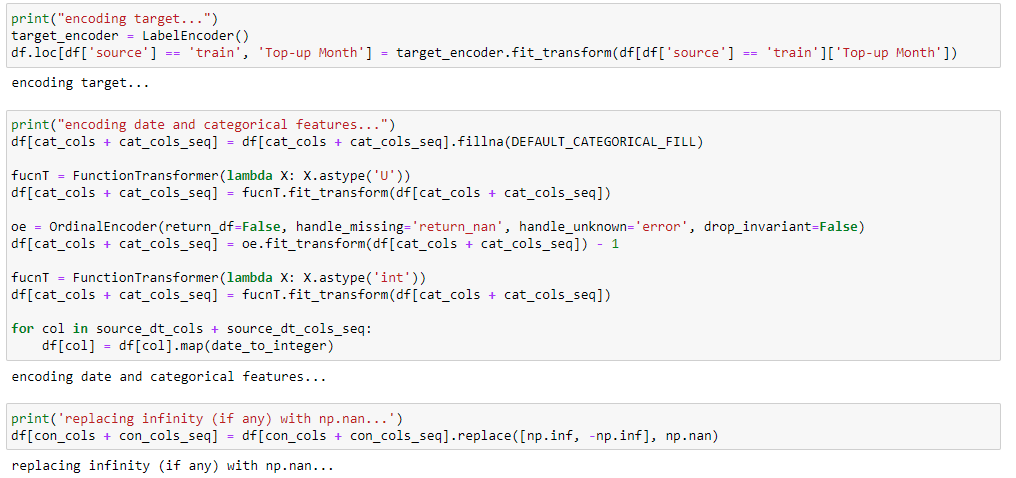

## Modelling

1) Worked with three algorithms with **GroupKFold** over **"ID"** column viz. xgboost, catboost and lightgbm. We use **catboost** for creating our submissing file. We equally ensemble 10 catboost models trained over 10 folds of the training data **i.e. preds/n_folds**

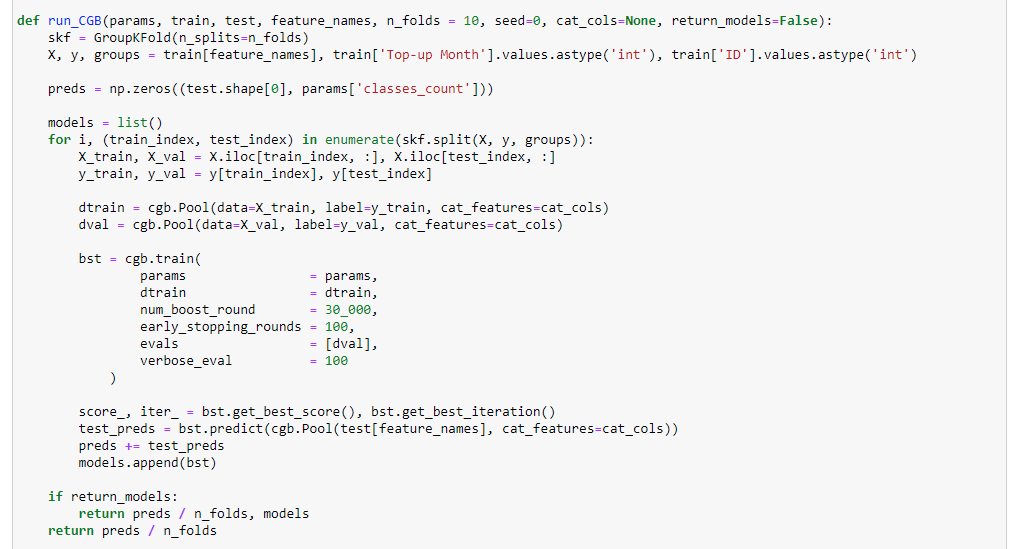

2) Training model

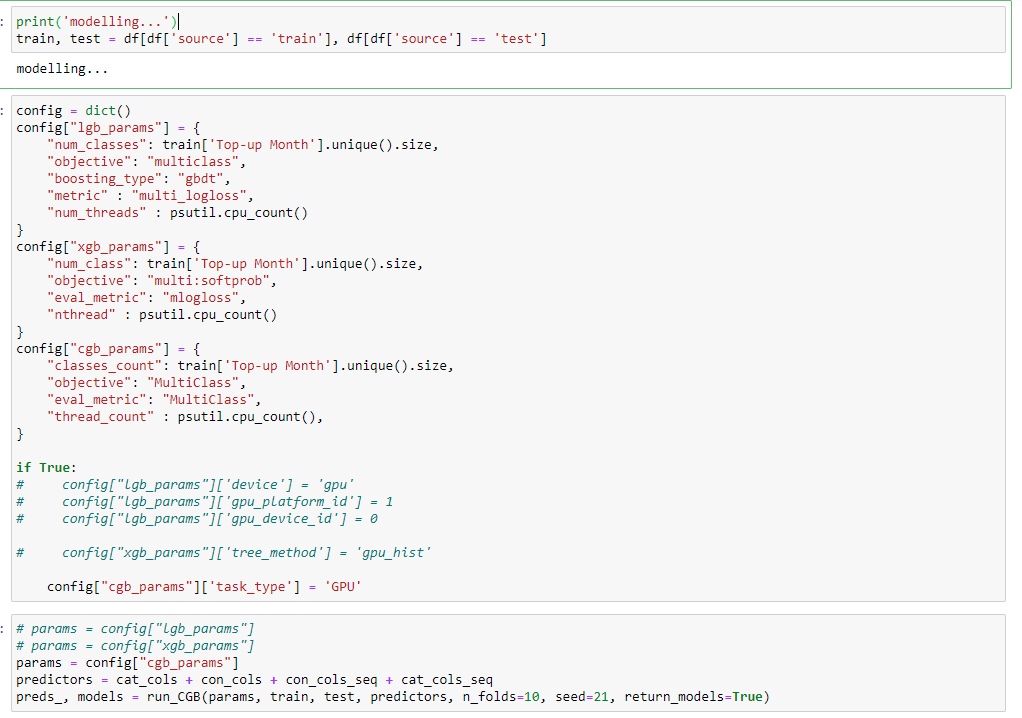

## Submission

Created a submission file by takeing the most common prediction across records for particular **"ID"**

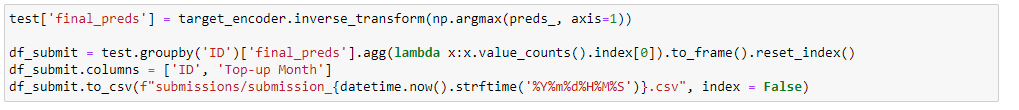

## Public LeaderBoard Score: 0.389901574412076